In [1]:
import sys, re, os
import numpy as np
import pandas as pd


In [2]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [3]:
chdir = True

In [4]:
import zipfile

def unzip_file(zip_file_path, destination_folder):
    with zipfile.ZipFile(zip_file_path, 'r') as files:
        files.extractall(destination_folder)

In [5]:
load_stimulus_global = pd.DataFrame()
file_names = []

for i in range(3, 8):
    for j in [1,3]:
        for k in range(1,6):
            item = 'resource_stimulus_exp-{}-{}-{}.csv'.format(i,j,k)
            file_names.append(item)

file_names.remove('resource_stimulus_exp-3-1-1.csv')
print(file_names)

['resource_stimulus_exp-3-1-2.csv', 'resource_stimulus_exp-3-1-3.csv', 'resource_stimulus_exp-3-1-4.csv', 'resource_stimulus_exp-3-1-5.csv', 'resource_stimulus_exp-3-3-1.csv', 'resource_stimulus_exp-3-3-2.csv', 'resource_stimulus_exp-3-3-3.csv', 'resource_stimulus_exp-3-3-4.csv', 'resource_stimulus_exp-3-3-5.csv', 'resource_stimulus_exp-4-1-1.csv', 'resource_stimulus_exp-4-1-2.csv', 'resource_stimulus_exp-4-1-3.csv', 'resource_stimulus_exp-4-1-4.csv', 'resource_stimulus_exp-4-1-5.csv', 'resource_stimulus_exp-4-3-1.csv', 'resource_stimulus_exp-4-3-2.csv', 'resource_stimulus_exp-4-3-3.csv', 'resource_stimulus_exp-4-3-4.csv', 'resource_stimulus_exp-4-3-5.csv', 'resource_stimulus_exp-5-1-1.csv', 'resource_stimulus_exp-5-1-2.csv', 'resource_stimulus_exp-5-1-3.csv', 'resource_stimulus_exp-5-1-4.csv', 'resource_stimulus_exp-5-1-5.csv', 'resource_stimulus_exp-5-3-1.csv', 'resource_stimulus_exp-5-3-2.csv', 'resource_stimulus_exp-5-3-3.csv', 'resource_stimulus_exp-5-3-4.csv', 'resource_stimulus_

In [6]:
folder_path = os.path.abspath(os.path.join("../dag-1/datasets"))
combined_df = pd.DataFrame()
for file_name in file_names:
    print(file_name)
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Save the combined DataFrame as a new CSV file
abs_path = os.path.join("..\\dag-1\\datasets", 'resource_stimulus_global_A-B-C.csv')
combined_df.to_csv(abs_path, index=False)

# Read the combined DataFrame from the CSV file
file_path = os.path.abspath('../dag-1/datasets/resource_stimulus_global_A-B-C.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
df = data.dropna()
df.info()
df.latency


resource_stimulus_exp-3-1-2.csv
resource_stimulus_exp-3-1-3.csv
resource_stimulus_exp-3-1-4.csv
resource_stimulus_exp-3-1-5.csv
resource_stimulus_exp-3-3-1.csv
resource_stimulus_exp-3-3-2.csv
resource_stimulus_exp-3-3-3.csv
resource_stimulus_exp-3-3-4.csv
resource_stimulus_exp-3-3-5.csv
resource_stimulus_exp-4-1-1.csv
resource_stimulus_exp-4-1-2.csv
resource_stimulus_exp-4-1-3.csv
resource_stimulus_exp-4-1-4.csv
resource_stimulus_exp-4-1-5.csv
resource_stimulus_exp-4-3-1.csv
resource_stimulus_exp-4-3-2.csv
resource_stimulus_exp-4-3-3.csv
resource_stimulus_exp-4-3-4.csv
resource_stimulus_exp-4-3-5.csv
resource_stimulus_exp-5-1-1.csv
resource_stimulus_exp-5-1-2.csv
resource_stimulus_exp-5-1-3.csv
resource_stimulus_exp-5-1-4.csv
resource_stimulus_exp-5-1-5.csv
resource_stimulus_exp-5-3-1.csv
resource_stimulus_exp-5-3-2.csv
resource_stimulus_exp-5-3-3.csv
resource_stimulus_exp-5-3-4.csv
resource_stimulus_exp-5-3-5.csv
resource_stimulus_exp-6-1-1.csv
resource_stimulus_exp-6-1-2.csv
resource

Unnamed: 0
0     176.230
1     122.137
2     124.307
3     127.223
4     194.749
       ...   
41     14.156
42      9.344
43     10.467
44      9.972
45     10.419
Name: latency, Length: 2229, dtype: float64

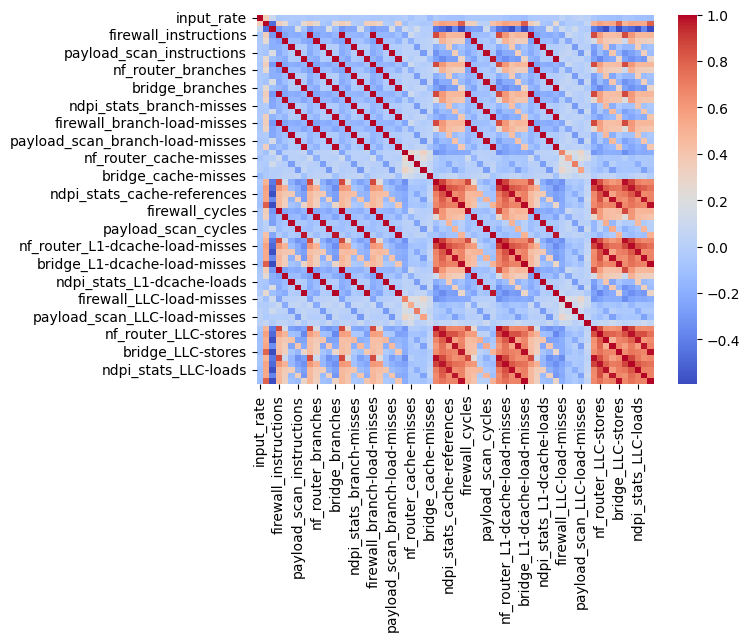

In [7]:
# heatmap
import matplotlib.pyplot as plt
import seaborn as sns   
corr = df.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.show()

In [8]:
corr = data.corr()
correlation_list = []
for i in range(1,2):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and bridge_cache-references: 0.80
Correlation between output_rate and bridge_L1-dcache-load-misses: 0.80
Correlation between output_rate and bridge_LLC-loads: 0.80
Correlation between output_rate and bridge_LLC-stores: 0.79
Correlation between output_rate and nf_router_cache-references: 0.57
Correlation between output_rate and nf_router_LLC-stores: 0.57
Correlation between output_rate and nf_router_L1-dcache-load-misses: 0.57
Correlation between output_rate and nf_router_LLC-loads: 0.56
Correlation between output_rate and payload_scan_cache-references: 0.55
Correlation between output_rate and payload_scan_LLC-stores: 0.55
Correlation between output_rate and ndpi_stats_cache-references: 0.54
Correlation between output_rate and ndpi_stats_LLC-loads: 0.54
Correlation between output_rate and payload_scan_L1-dcache-load-misses: 0.54
Correlation between output_rate and payload_scan_LLC-loads: 0.54
Correlation between output_rate and ndpi_stats_L1-dcache-load-m

In [9]:
corr = data.corr()
correlation_list = []
for i in range(2,3):
    for j in range(len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between latency and latency: 1.00
Correlation between latency and bridge_L1-dcache-load-misses: 0.59
Correlation between latency and bridge_cache-references: 0.59
Correlation between latency and bridge_LLC-stores: 0.59
Correlation between latency and bridge_LLC-loads: 0.59
Correlation between latency and ndpi_stats_LLC-stores: 0.59
Correlation between latency and ndpi_stats_LLC-loads: 0.58
Correlation between latency and ndpi_stats_cache-references: 0.58
Correlation between latency and ndpi_stats_L1-dcache-load-misses: 0.58
Correlation between latency and nf_router_L1-dcache-load-misses: 0.49
Correlation between latency and nf_router_LLC-stores: 0.49
Correlation between latency and nf_router_LLC-loads: 0.49
Correlation between latency and nf_router_cache-references: 0.48
Correlation between latency and output_rate: 0.48
Correlation between latency and firewall_LLC-loads: 0.43
Correlation between latency and firewall_L1-dcache-load-misses: 0.43
Correlation between latency an

<Axes: >

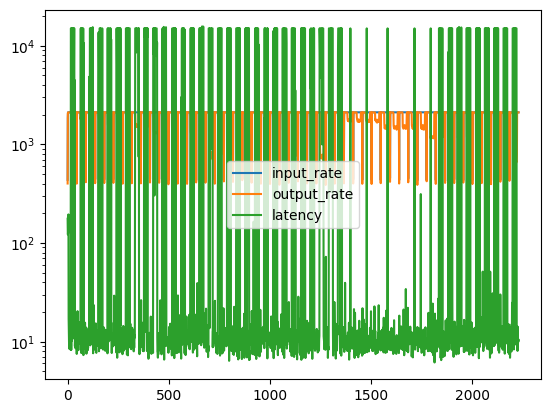

In [10]:
data = data.reset_index(drop=True)
data
data.iloc[:, :3].plot(logy=True)